In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
#数据的加载
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("./附件2 慢性病及相关因素流调数据.xlsx")
data
c_list = data.values.tolist()[0]  # 得到想要设置为列索引【表头】的某一行提取出来
data.columns = c_list  		    # 设置列索引【表头】
data.drop([0], inplace=True)

In [3]:
data.fillna(0,inplace=True)

In [4]:
feature_work = ["工作主要属于以下何种活动","您做休闲、家务活动的强度","是否参加体育锻炼","体育锻炼的强度","平均每天体育锻炼时间"]
target_work = "有没有被社区或以上医院的医生诊断过患有高血压"

In [6]:
x_train,x_test,y_trian,y_test =train_test_split(data[feature_work],data[target_work],test_size = 0.2,random_state=5)

In [7]:
gbm = GradientBoostingClassifier(random_state=12)
gbm.fit(x_train,y_trian)

GradientBoostingClassifier(random_state=12)

In [8]:
y_pred = gbm.predict(x_test)
y_pred

array([2, 2, 0, ..., 2, 2, 2], dtype=int64)

In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        32
           1       0.00      0.00      0.00       126
           2       0.91      1.00      0.95      1436

    accuracy                           0.91      1594
   macro avg       0.64      0.58      0.60      1594
weighted avg       0.84      0.91      0.88      1594



In [10]:
feature_importances = gbm.feature_importances_
feaure_name = x_train.columns

In [11]:
feature_importances_df = pd.DataFrame({
    "特征":feaure_name,
    "重要性":feature_importances
})

Text(0.5, 1.0, '特征重要性')

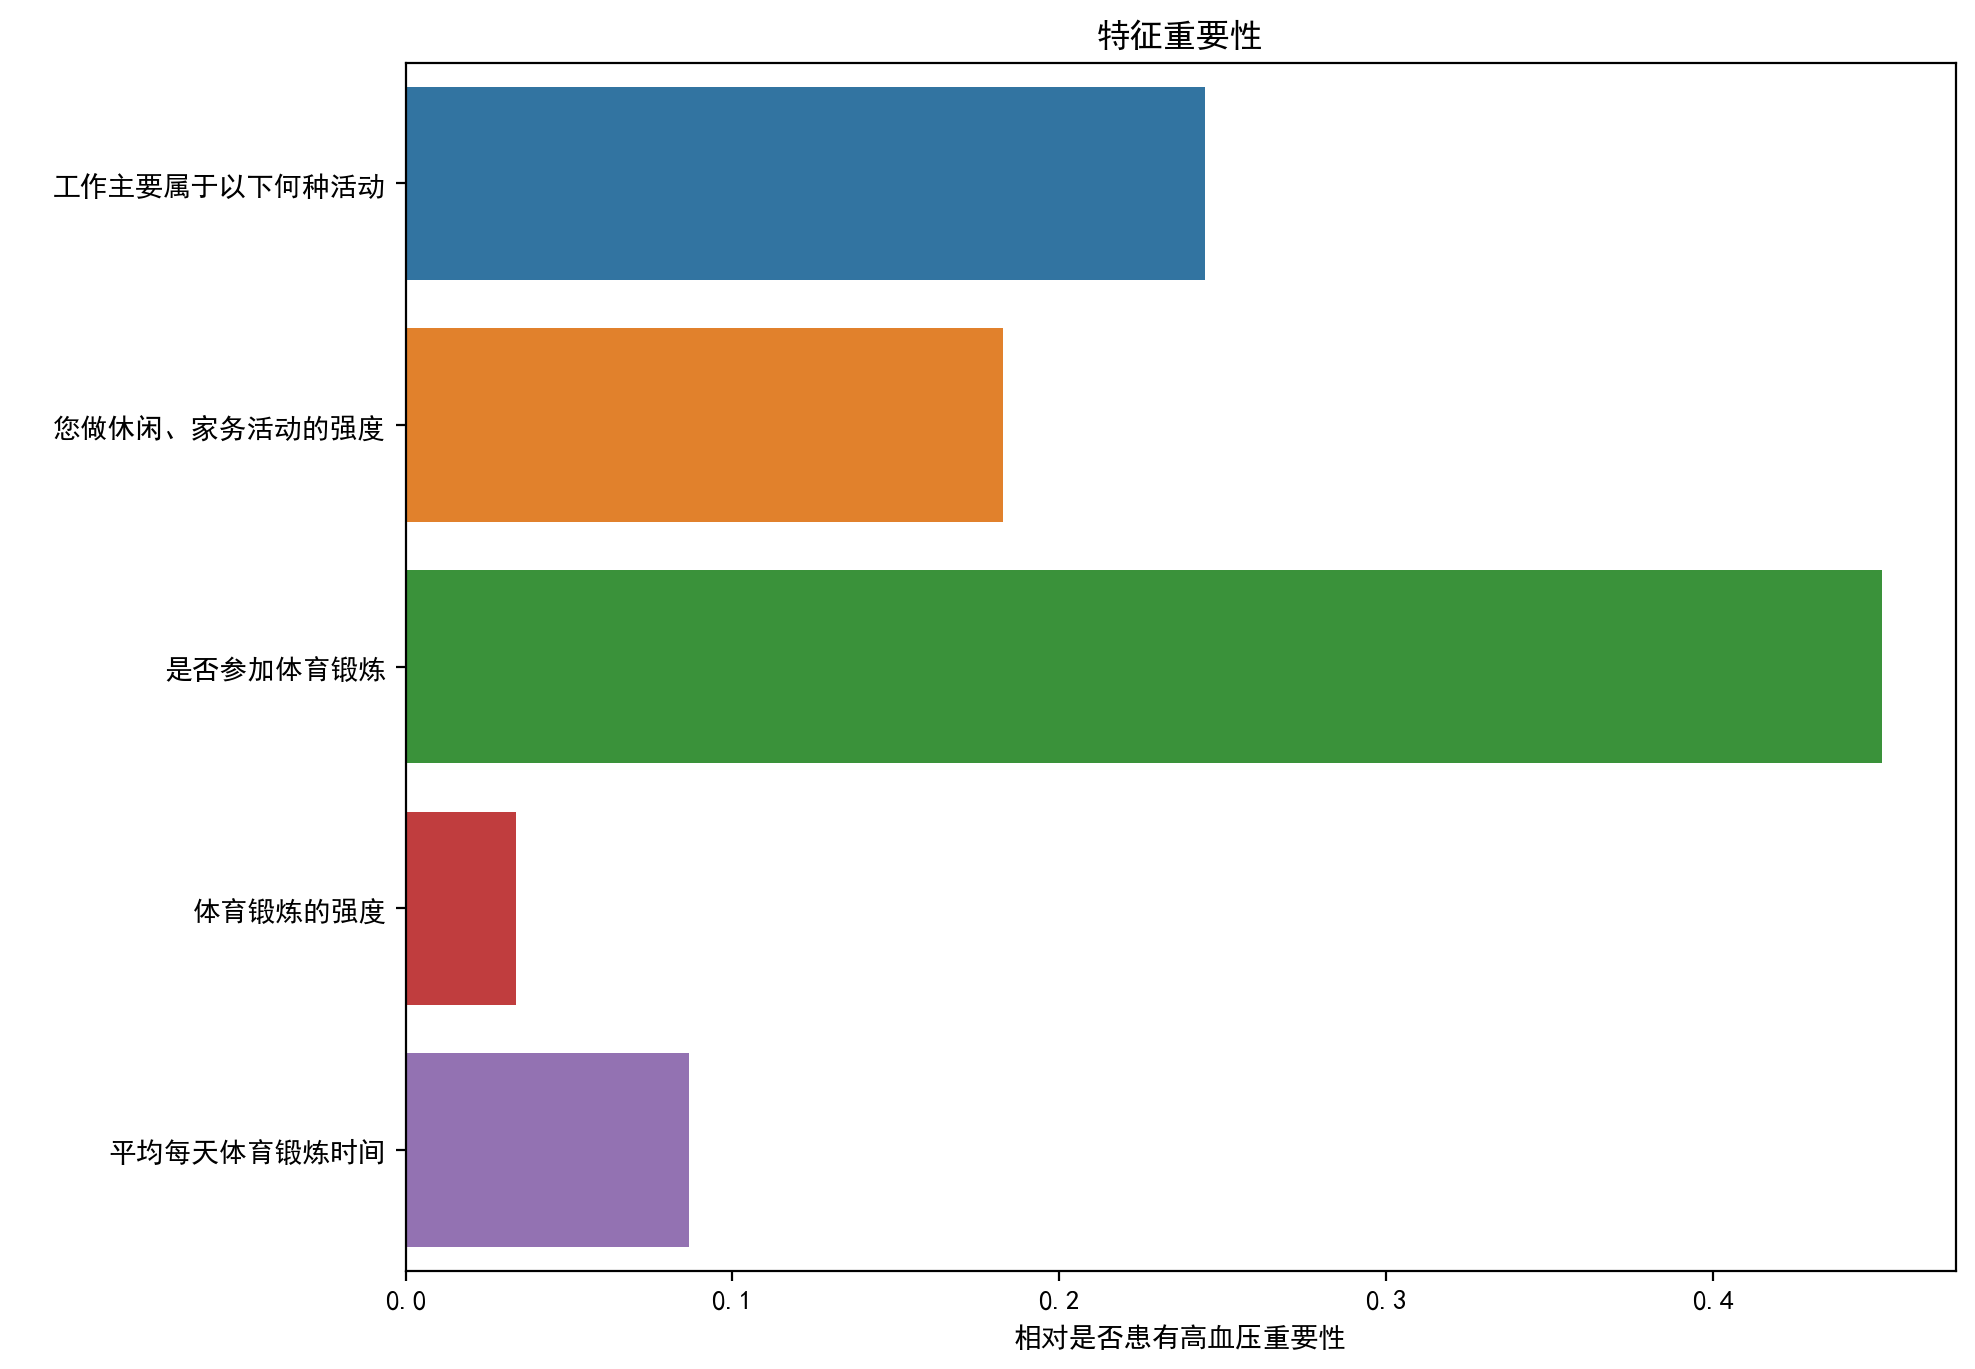

In [14]:
plt.figure(figsize = (10,8),dpi = 200)
sns.barplot(x="重要性",y="特征",data = feature_importances_df[:20],ci=None)
plt.xlabel("相对是否患有高血压重要性")
plt.ylabel(" ")
plt.title("特征重要性")

In [17]:
##接下来是糖尿病的关系
feature_work = ["工作主要属于以下何种活动","您做休闲、家务活动的强度","是否参加体育锻炼","体育锻炼的强度","平均每天体育锻炼时间"]
target_work_D = "您有没有被社区或以上医院的医生诊断患有糖尿病"

In [19]:
x_train,x_test,y_trian,y_test =train_test_split(data[feature_work],data[target_work_D],test_size = 0.2,random_state=0)

In [20]:
gbm = GradientBoostingClassifier(random_state=12)
gbm.fit(x_train,y_trian)

GradientBoostingClassifier(random_state=12)

In [21]:
y_pred = gbm.predict(x_test)
y_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.67      0.79        48
           1       0.00      0.00      0.00        45
           2       0.96      1.00      0.98      1501

    accuracy                           0.96      1594
   macro avg       0.64      0.56      0.59      1594
weighted avg       0.93      0.96      0.95      1594



In [23]:
feature_importances_D = gbm.feature_importances_
feaure_name_D = x_train.columns

In [24]:
feature_importances_df_D = pd.DataFrame({
    "特征":feaure_name_D,
    "重要性":feature_importances_D
})

Text(0.5, 1.0, '特征重要性')

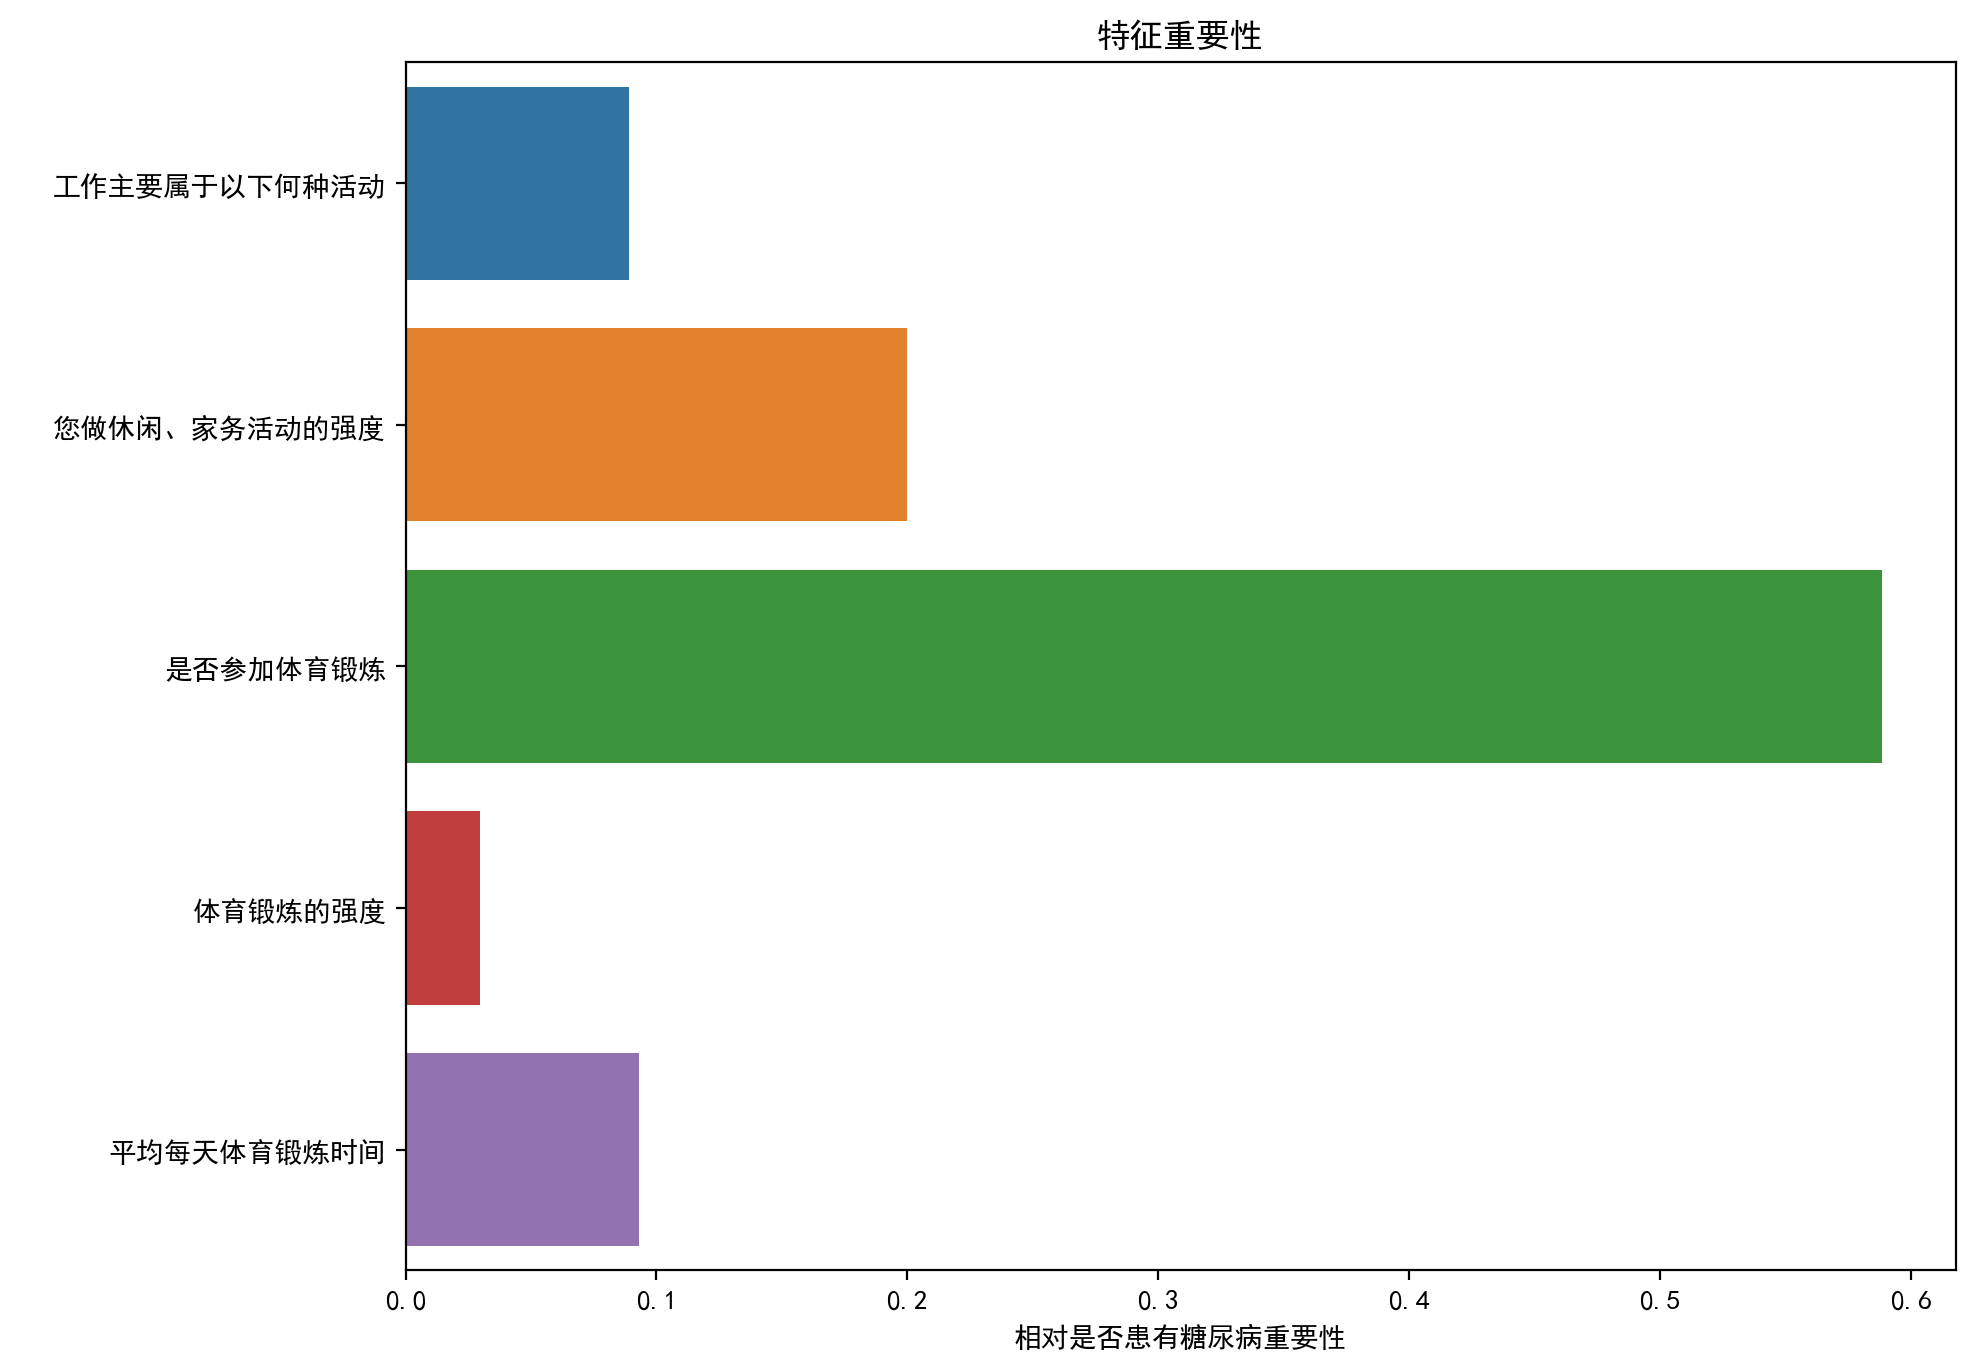

In [25]:
plt.figure(figsize = (10,8),dpi = 200)
sns.barplot(x="重要性",y="特征",data = feature_importances_df_D[:20],ci=None)
plt.ylabel(" ")
plt.xlabel("相对是否患有糖尿病重要性")
plt.title("特征重要性")